In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [27]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [28]:
# Display the first few rows of the dataset
df.head()

# Summary of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.0
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.0
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.0
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,0.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,0.0


In [29]:
df.fillna(df.median(), inplace=True)

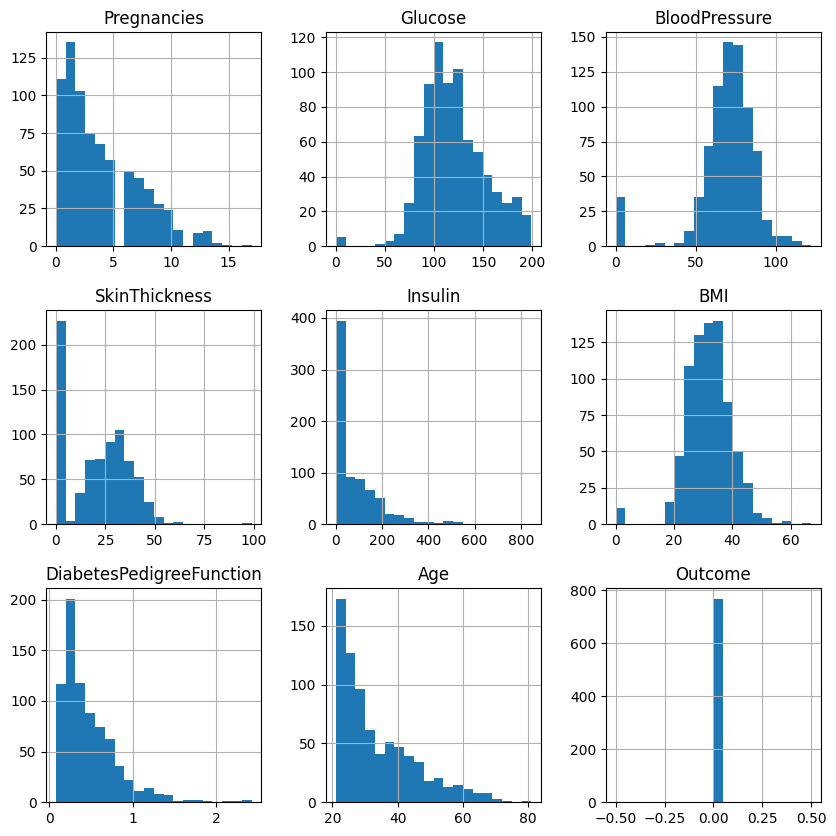

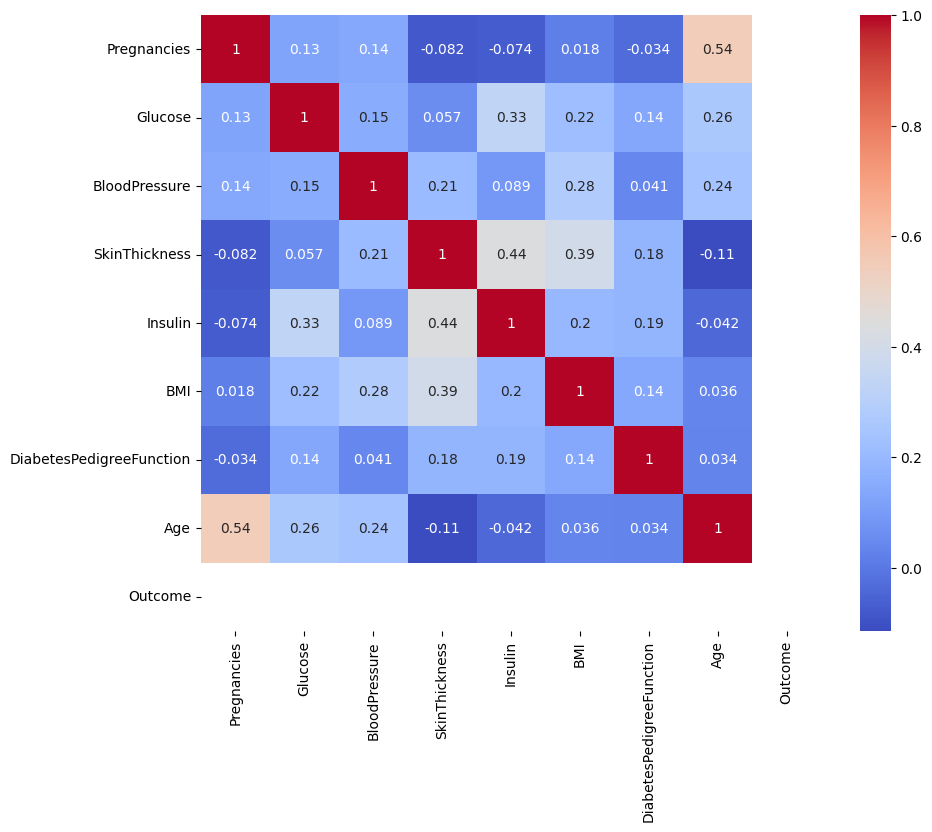

In [30]:
# Plot distribution of features
df.hist(bins=20, figsize=(10,10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


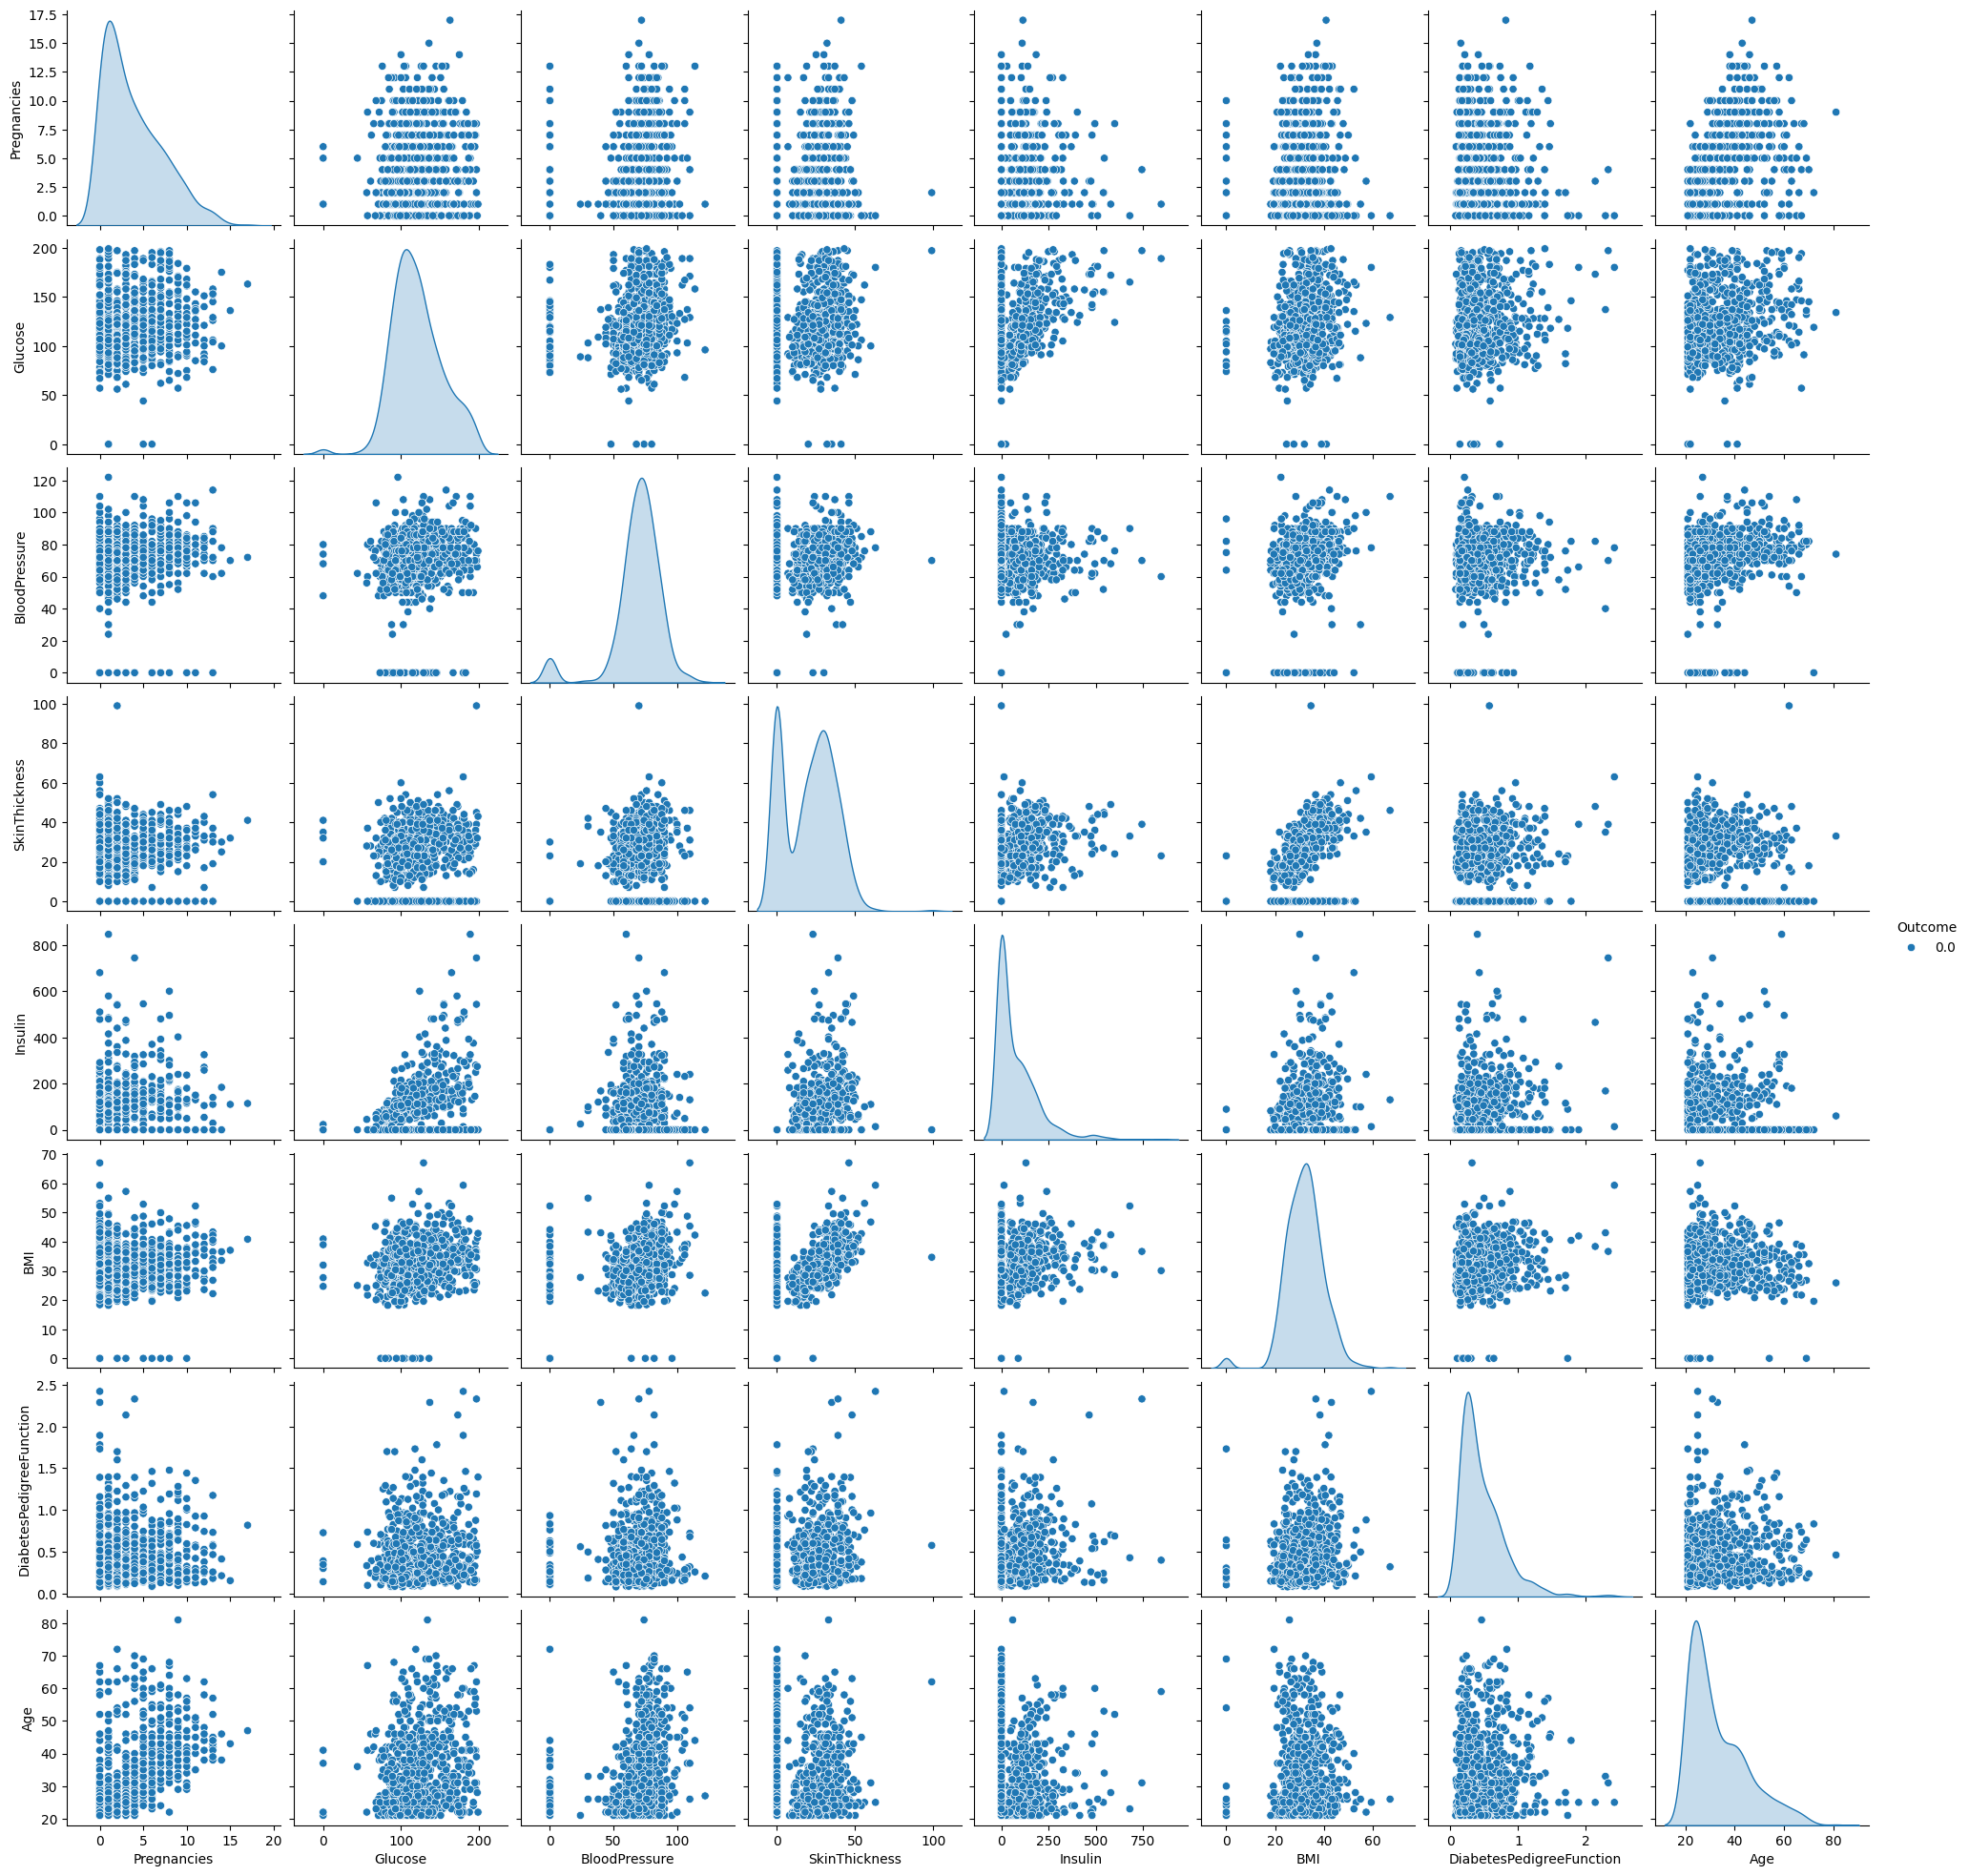

In [31]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='Outcome')
plt.show()


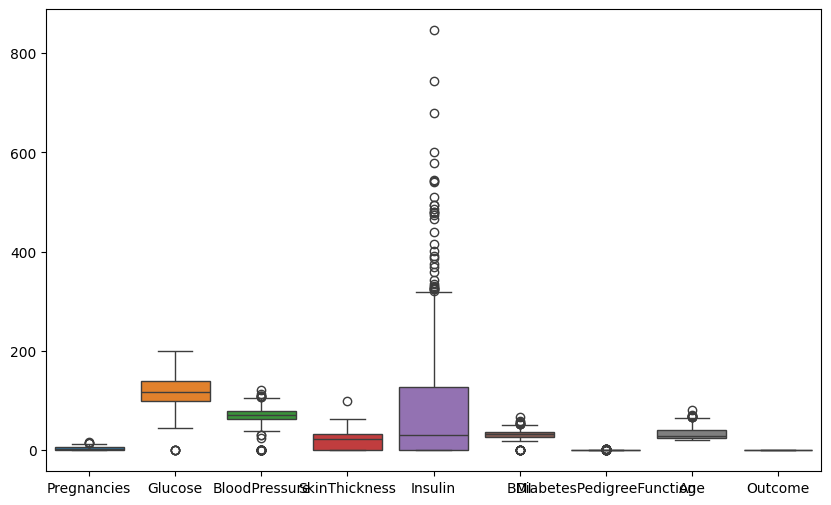

In [32]:
# Boxplot for outlier detection
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()


In [33]:
# Scaling the features
scaler = StandardScaler()

# Select columns to scale
columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [34]:
# Split the dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Train a RandomForest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


Accuracy: 1.0


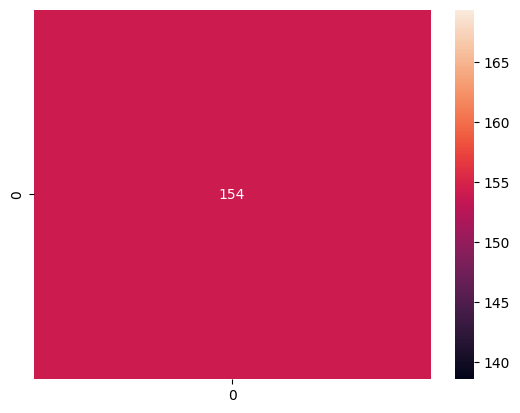

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       154

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [36]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


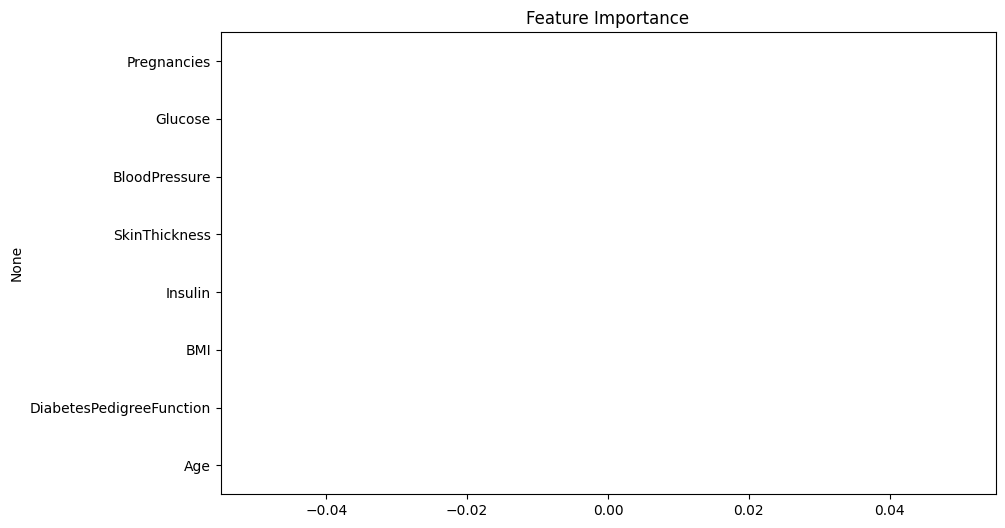

In [37]:
# Get feature importance
importance = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance')
plt.show()


In [38]:
# Hyperparameter tuning example (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
